In [2]:
import os
import glob
import pandas as pd 
import numpy as np

from typing import Union
from scipy.sparse import spmatrix
from sklearn.feature_extraction import DictVectorizer 
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, accuracy_score
from matplotlib import pyplot as plt

In [5]:
class FeatureExtractor(object):
    def egypt_neg(self, text):
        return 1 if u'مش' in text else 0
    def iraq (self, text):
        return 
    
    def create_feature_dict(self, text):
        return{
            "egy_neg": self.egy_neg(text)
        }

In [19]:
class LabelExtractor(object):
    def __init__(self):
        self.labels = LabelEncoder()
        
    def fit_and_transform_label(self, labels):
        return self.labels.fit_transform(labels)
    
    def Labels(self, labels):
        return self.labels.classes_

In [20]:
class FeatureEncoder(object):
    def __init__(self):
        self.dv = DictVectorizer()

    def fit_and_transform(self, texts):
        m = self.dv.fit_transform(texts)
        return m

    def get_feature_names(self):
        feature_names = self.dv.get_feature_names()
        return feature_names

In [30]:
# read data 
train = read_file('./data/train_labeled.tsv')
dev = read_file('./data/dev_labeled.tsv')
test = read_file('./data/test_unlabeled.tsv')

In [31]:
# iterate over the data and use FeatureExtractor class
feature_extraction = FeatureExtractor()
feature_reps = [] 
for sent in train['#2 tweet_content']:
    feature_dict = feature_extraction.create_feature_dict(sent)
    feature_reps.append(feature_dict)

In [32]:
"""
Using the FeatureEncoder class, we now will take the dictionary that we got from the FeatureExtractor and perform
fit and transform to get a sparse matrix that we will use to train the classifier. 
"""

datum = feature_reps
features = FeatureEncoder()
labels = LabelExtractor()

X = features.fit_and_transform(datum)
Y = labels.fit_and_transform_label(train['#3 country_label'])

print("\nFeatures: \n\n",features.get_feature_names())
print("\nLanguage Labels:\n\n", labels.Labels(dev['#3 country_label']))


Features: 

 ['egy_neg']

Language Labels:

 ['Algeria' 'Bahrain' 'Djibouti' 'Egypt' 'Iraq' 'Jordan' 'Kuwait' 'Lebanon'
 'Libya' 'Mauritania' 'Morocco' 'Oman' 'Palestine' 'Qatar' 'Saudi_Arabia'
 'Somalia' 'Sudan' 'Syria' 'Tunisia' 'United_Arab_Emirates' 'Yemen']


In [33]:
"""
Now we can train the Logistic Regression Classifier, feeding the feature matrix that we got from the DictVectorizer
and the Labels we got from the LabelEncoder. 
"""

print("\nTraining the Classifier...\n")

Z = Classifier()
Z.train(X,Y)

print("\nWeights (After Training:):\n\n", Z.weights(X))


Training the Classifier...


Weights (After Training:):

 [[-0.47277353]
 [-0.71860607]
 [-0.40497387]
 [ 1.0520721 ]
 [-0.7289435 ]
 [-0.16434922]
 [-1.14701814]
 [ 0.45025545]
 [ 0.26712254]
 [-0.40497387]
 [-0.22286877]
 [-0.59122503]
 [ 0.06921038]
 [-0.70402476]
 [-0.57787623]
 [-0.98259146]
 [-0.71860607]
 [-0.51813338]
 [ 0.52952995]
 [-0.79233098]
 [-0.1433291 ]]



Extracting Features from Development Data...


Making Predictions...


Calculating F1 Score and Accuracy ...



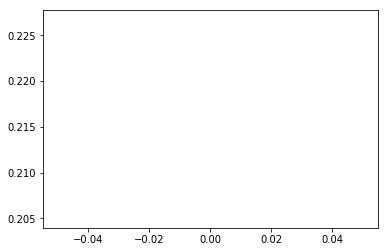


0.08 F1 score and 0.22 accuracy on the development data


Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       1.00      0.22      0.36      4957
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [40]:
"""
After training, we extract the features of the development data and make predictions using classifier.predict 
and then evaluate the performance using the evaluation metrics presented at the classification report at the end:
"""
print("\nExtracting Features from Development Data...\n")

development_data = dev['#2 tweet_content']
feature_reps_dev = [] 
for sent in development_data: 
    feature_dict = feature_extraction.create_feature_dict(sent)
    feature_reps_dev.append(feature_dict) 

print("\nMaking Predictions...\n")

dev_datum = features.fit_and_transform(feature_reps_dev)
predictions = Z.predict(dev_datum)
dev_indexes = labels.fit_and_transform_label(dev['#3 country_label'])

print("\nCalculating F1 Score and Accuracy ...\n")

f1 = f1_score(dev_indexes, predictions, average='weighted')
accuracy = accuracy_score(dev_indexes, predictions)
plt.plot(accuracy)
plt.show()

print(f"\n{round(f1, 2)} F1 score and {round(accuracy, 2)} accuracy on the development data\n")

print("\nClassification Report:\n")
target_names = ['Algeria' 'Bahrain' 'Djibouti' 'Egypt' 'Iraq' 'Jordan' 'Kuwait' 'Lebanon'
 'Libya' 'Mauritania' 'Morocco' 'Oman' 'Palestine' 'Qatar' 'Saudi_Arabia'
 'Somalia' 'Sudan' 'Syria' 'Tunisia' 'United_Arab_Emirates' 'Yemen']
#print(classification_report(predictions, dev_indexes, target_names=target_names))

print(classification_report(predictions, dev_indexes))